In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Set default plot size and DPI
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250

# Set Seaborn style
sns.set_style('darkgrid')


In [2]:
ak=pd.read_csv(r"C:\dfcity\Data science\assingment DS\Ds1\crime_data.csv")
ak.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


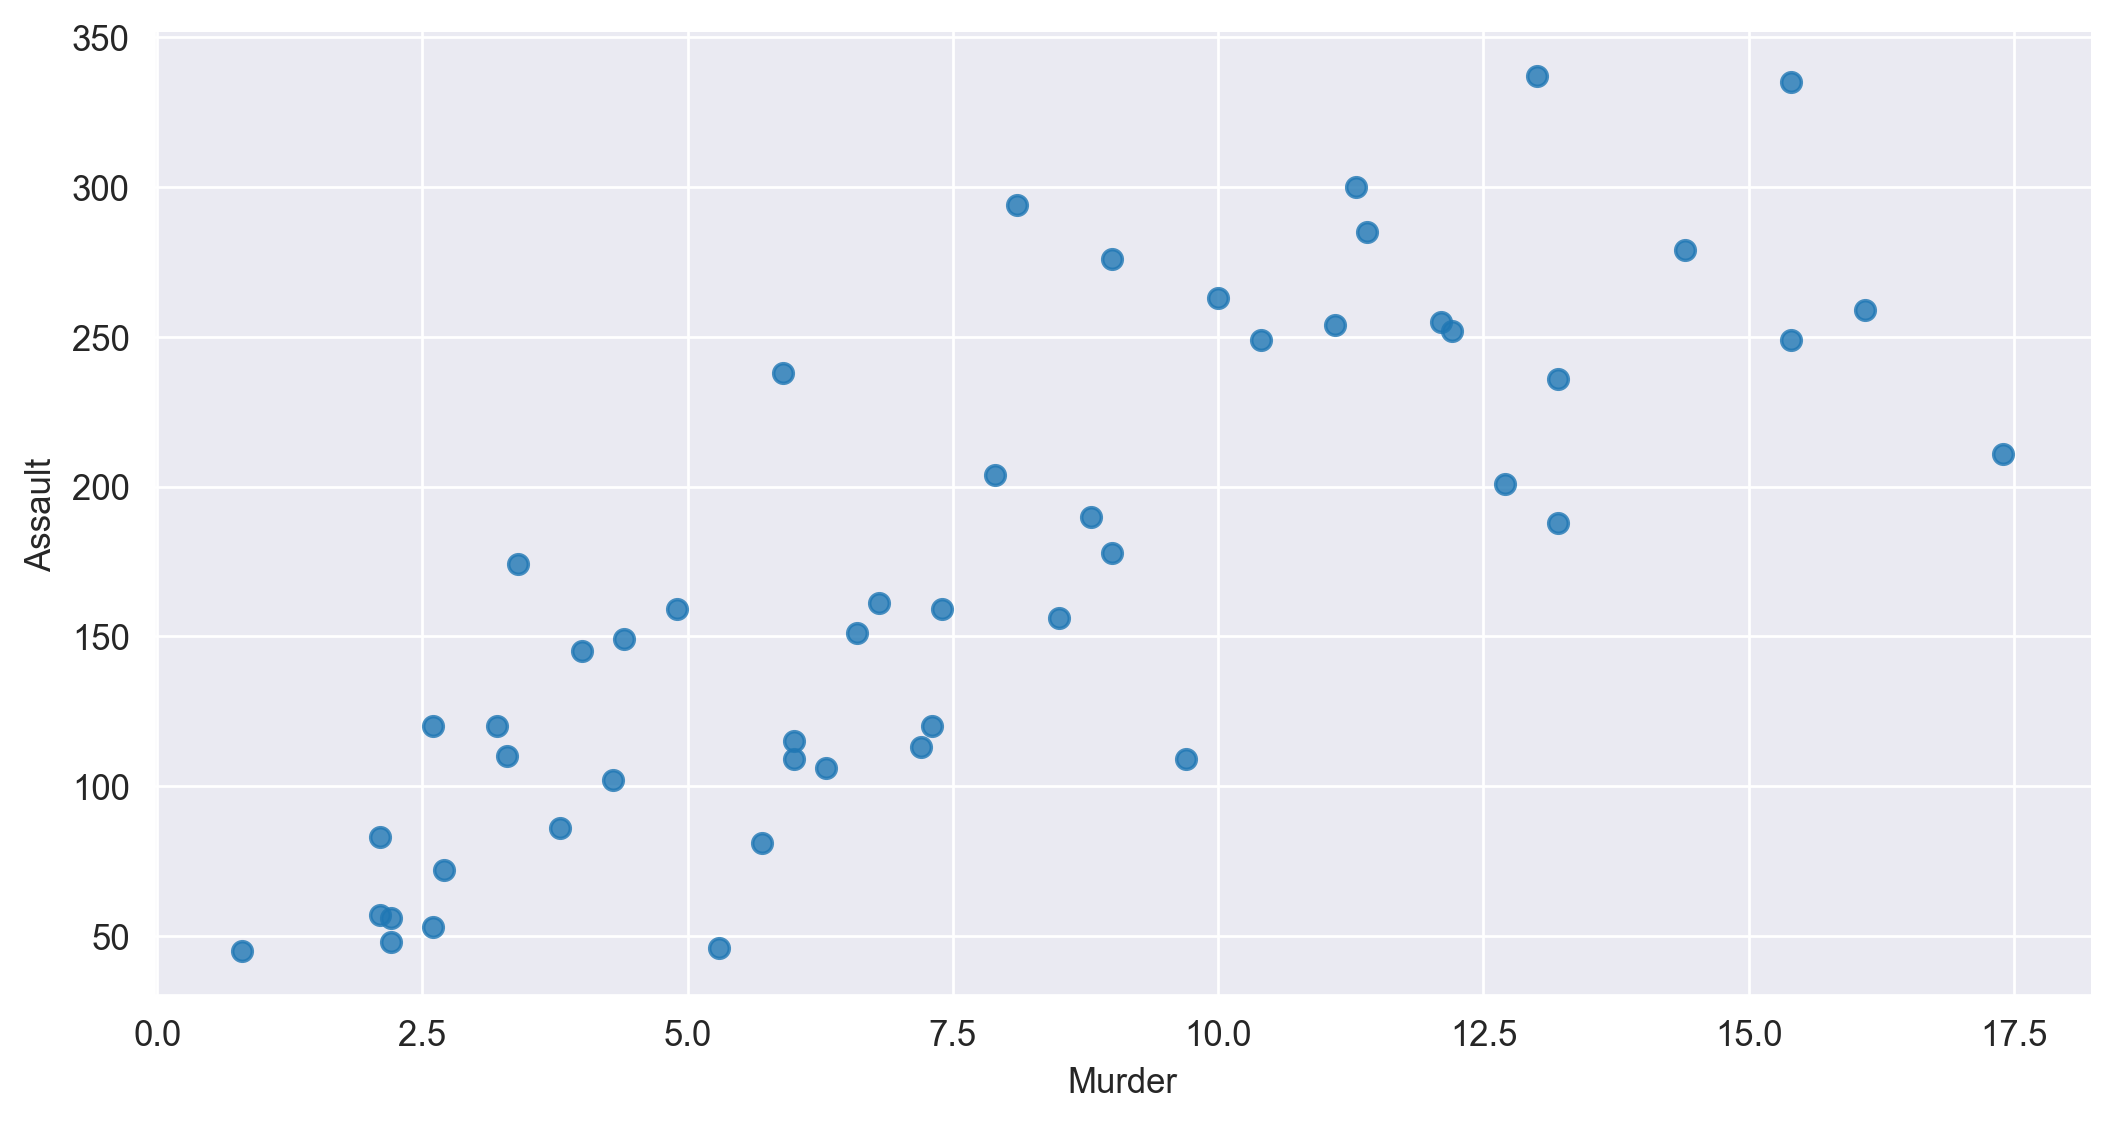

In [3]:
ak.plot(kind='scatter', x='Murder', y='Assault', s=32, alpha=.8)
# Get the current Axes instance and hide the top and right spines of the plot
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
ak.shape

(50, 5)

In [5]:
ak.drop(columns=["Unnamed: 0"], inplace=True)
ak

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


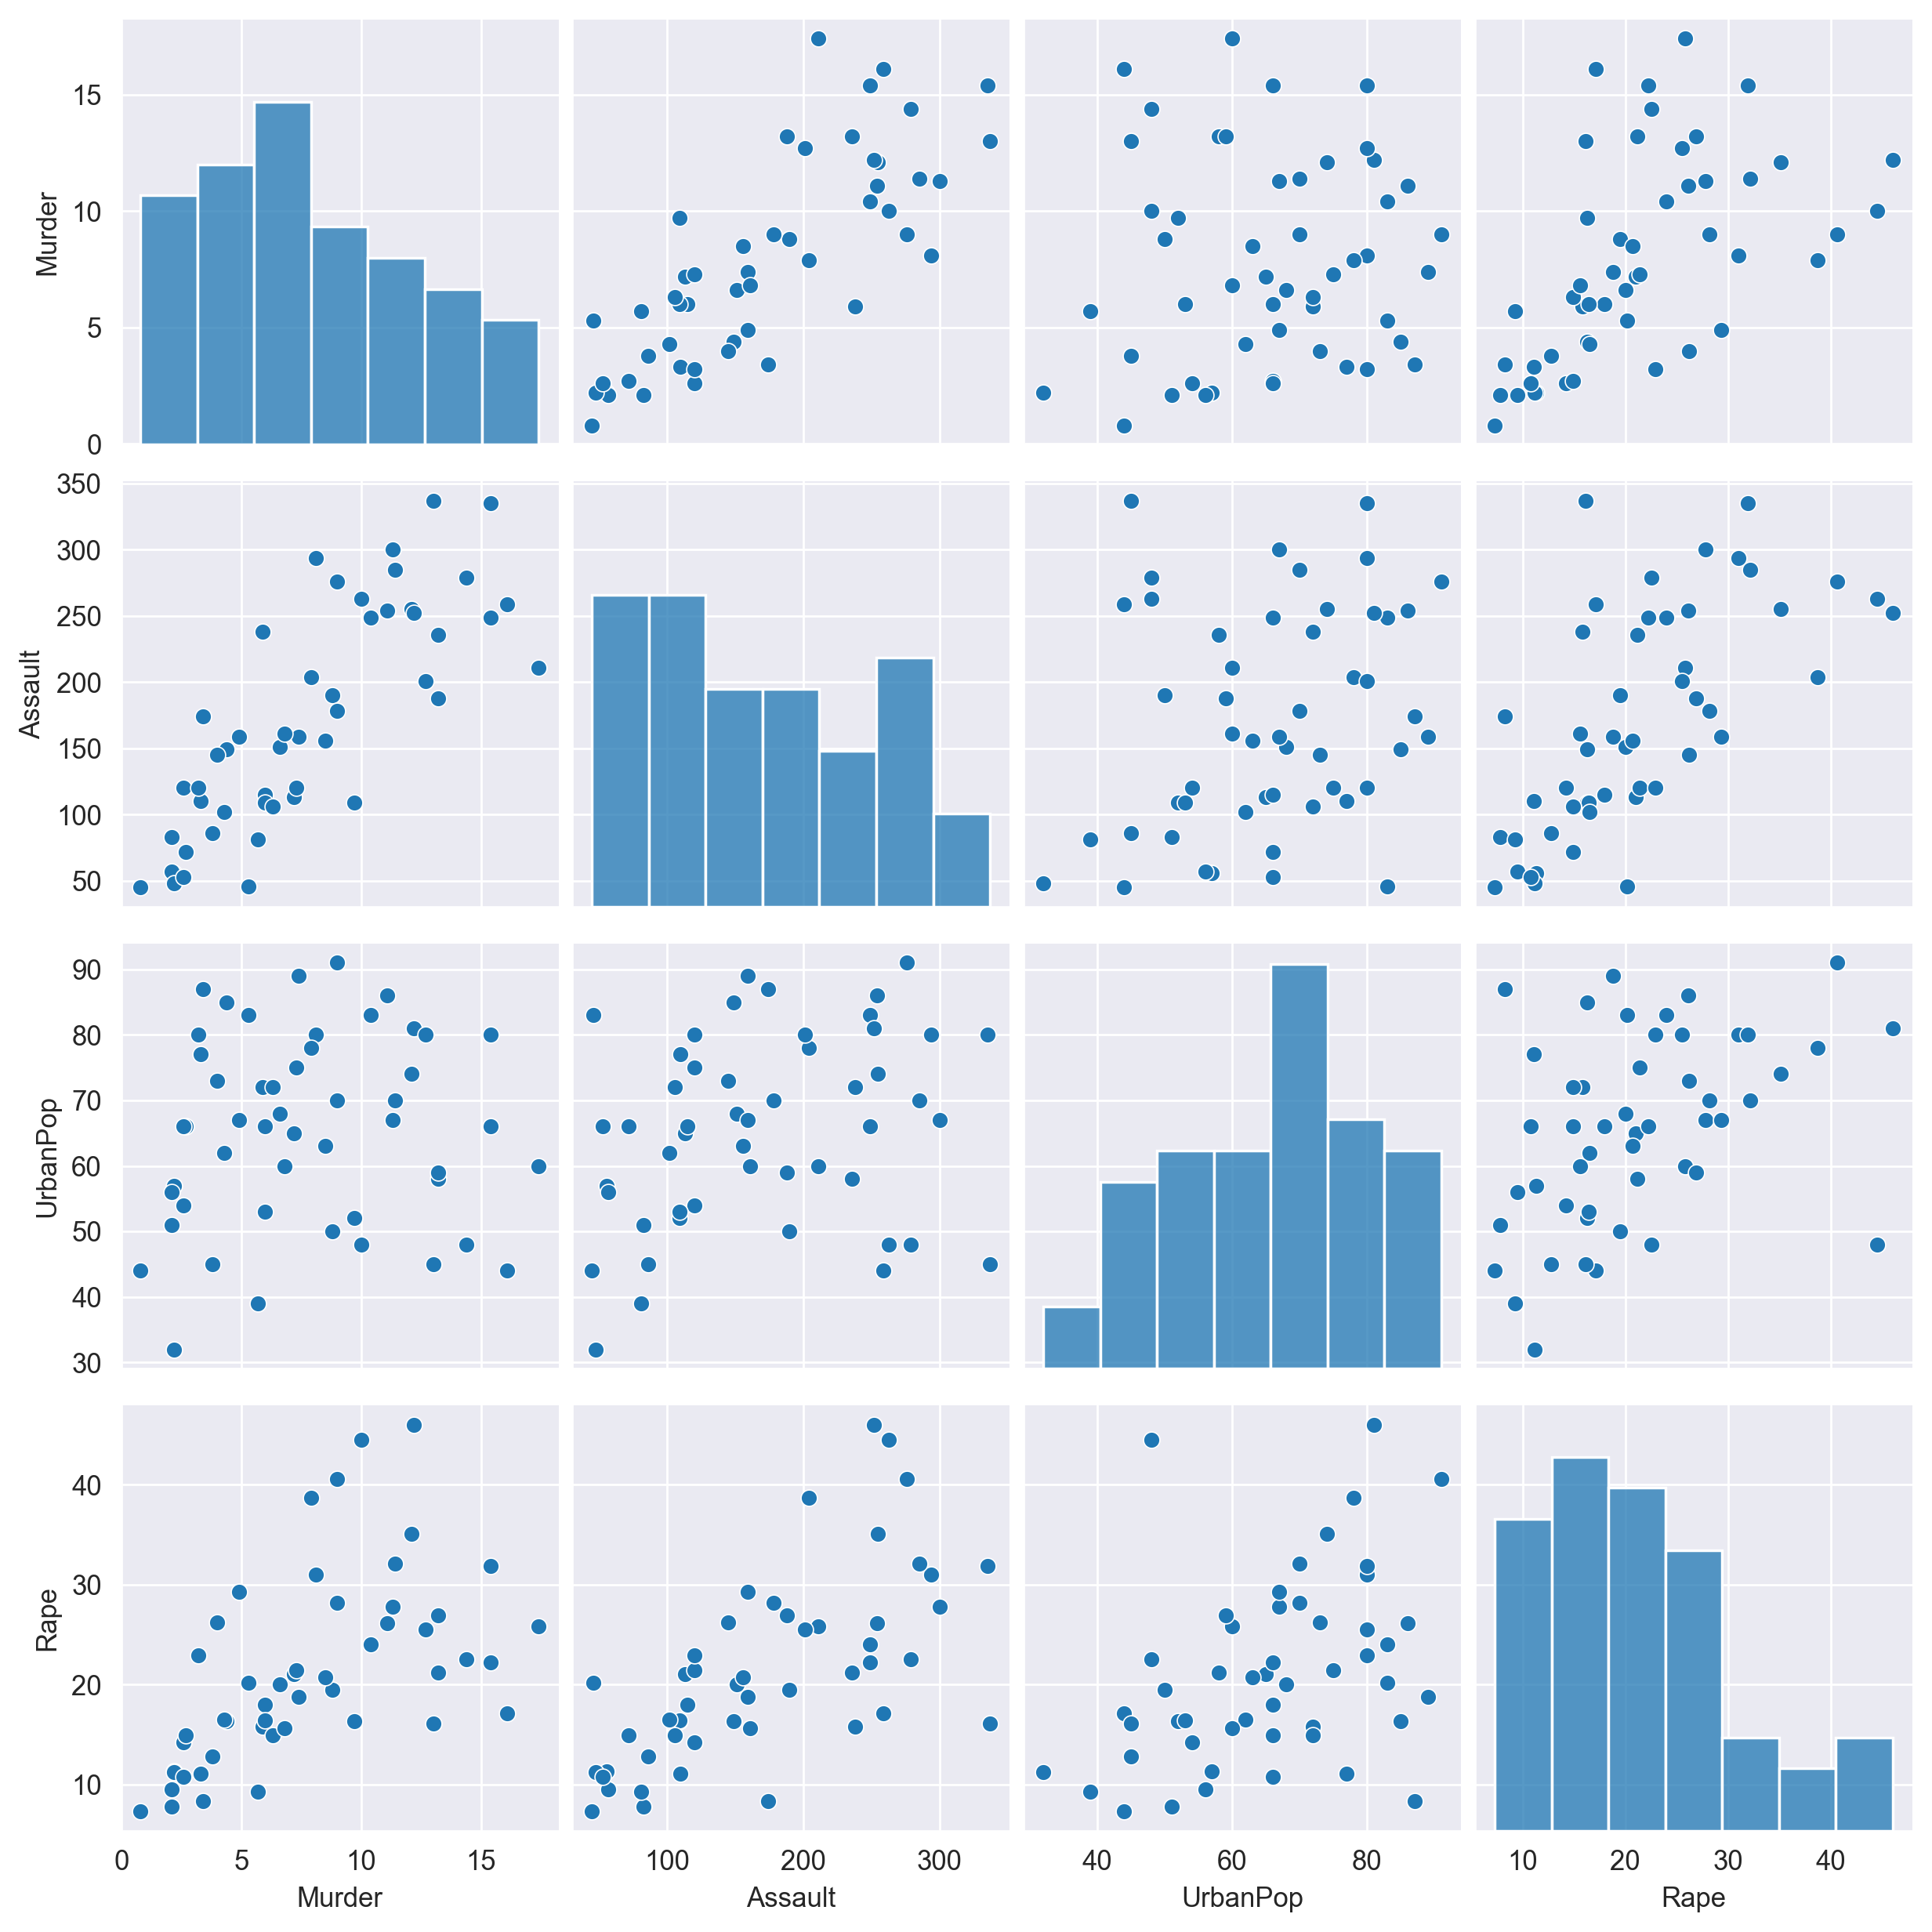

In [6]:
sns.pairplot(data=ak)

# 
Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Use the StandardScaler to transform the DataFrame 'df'
X=sc.fit_transform(ak)
X



array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

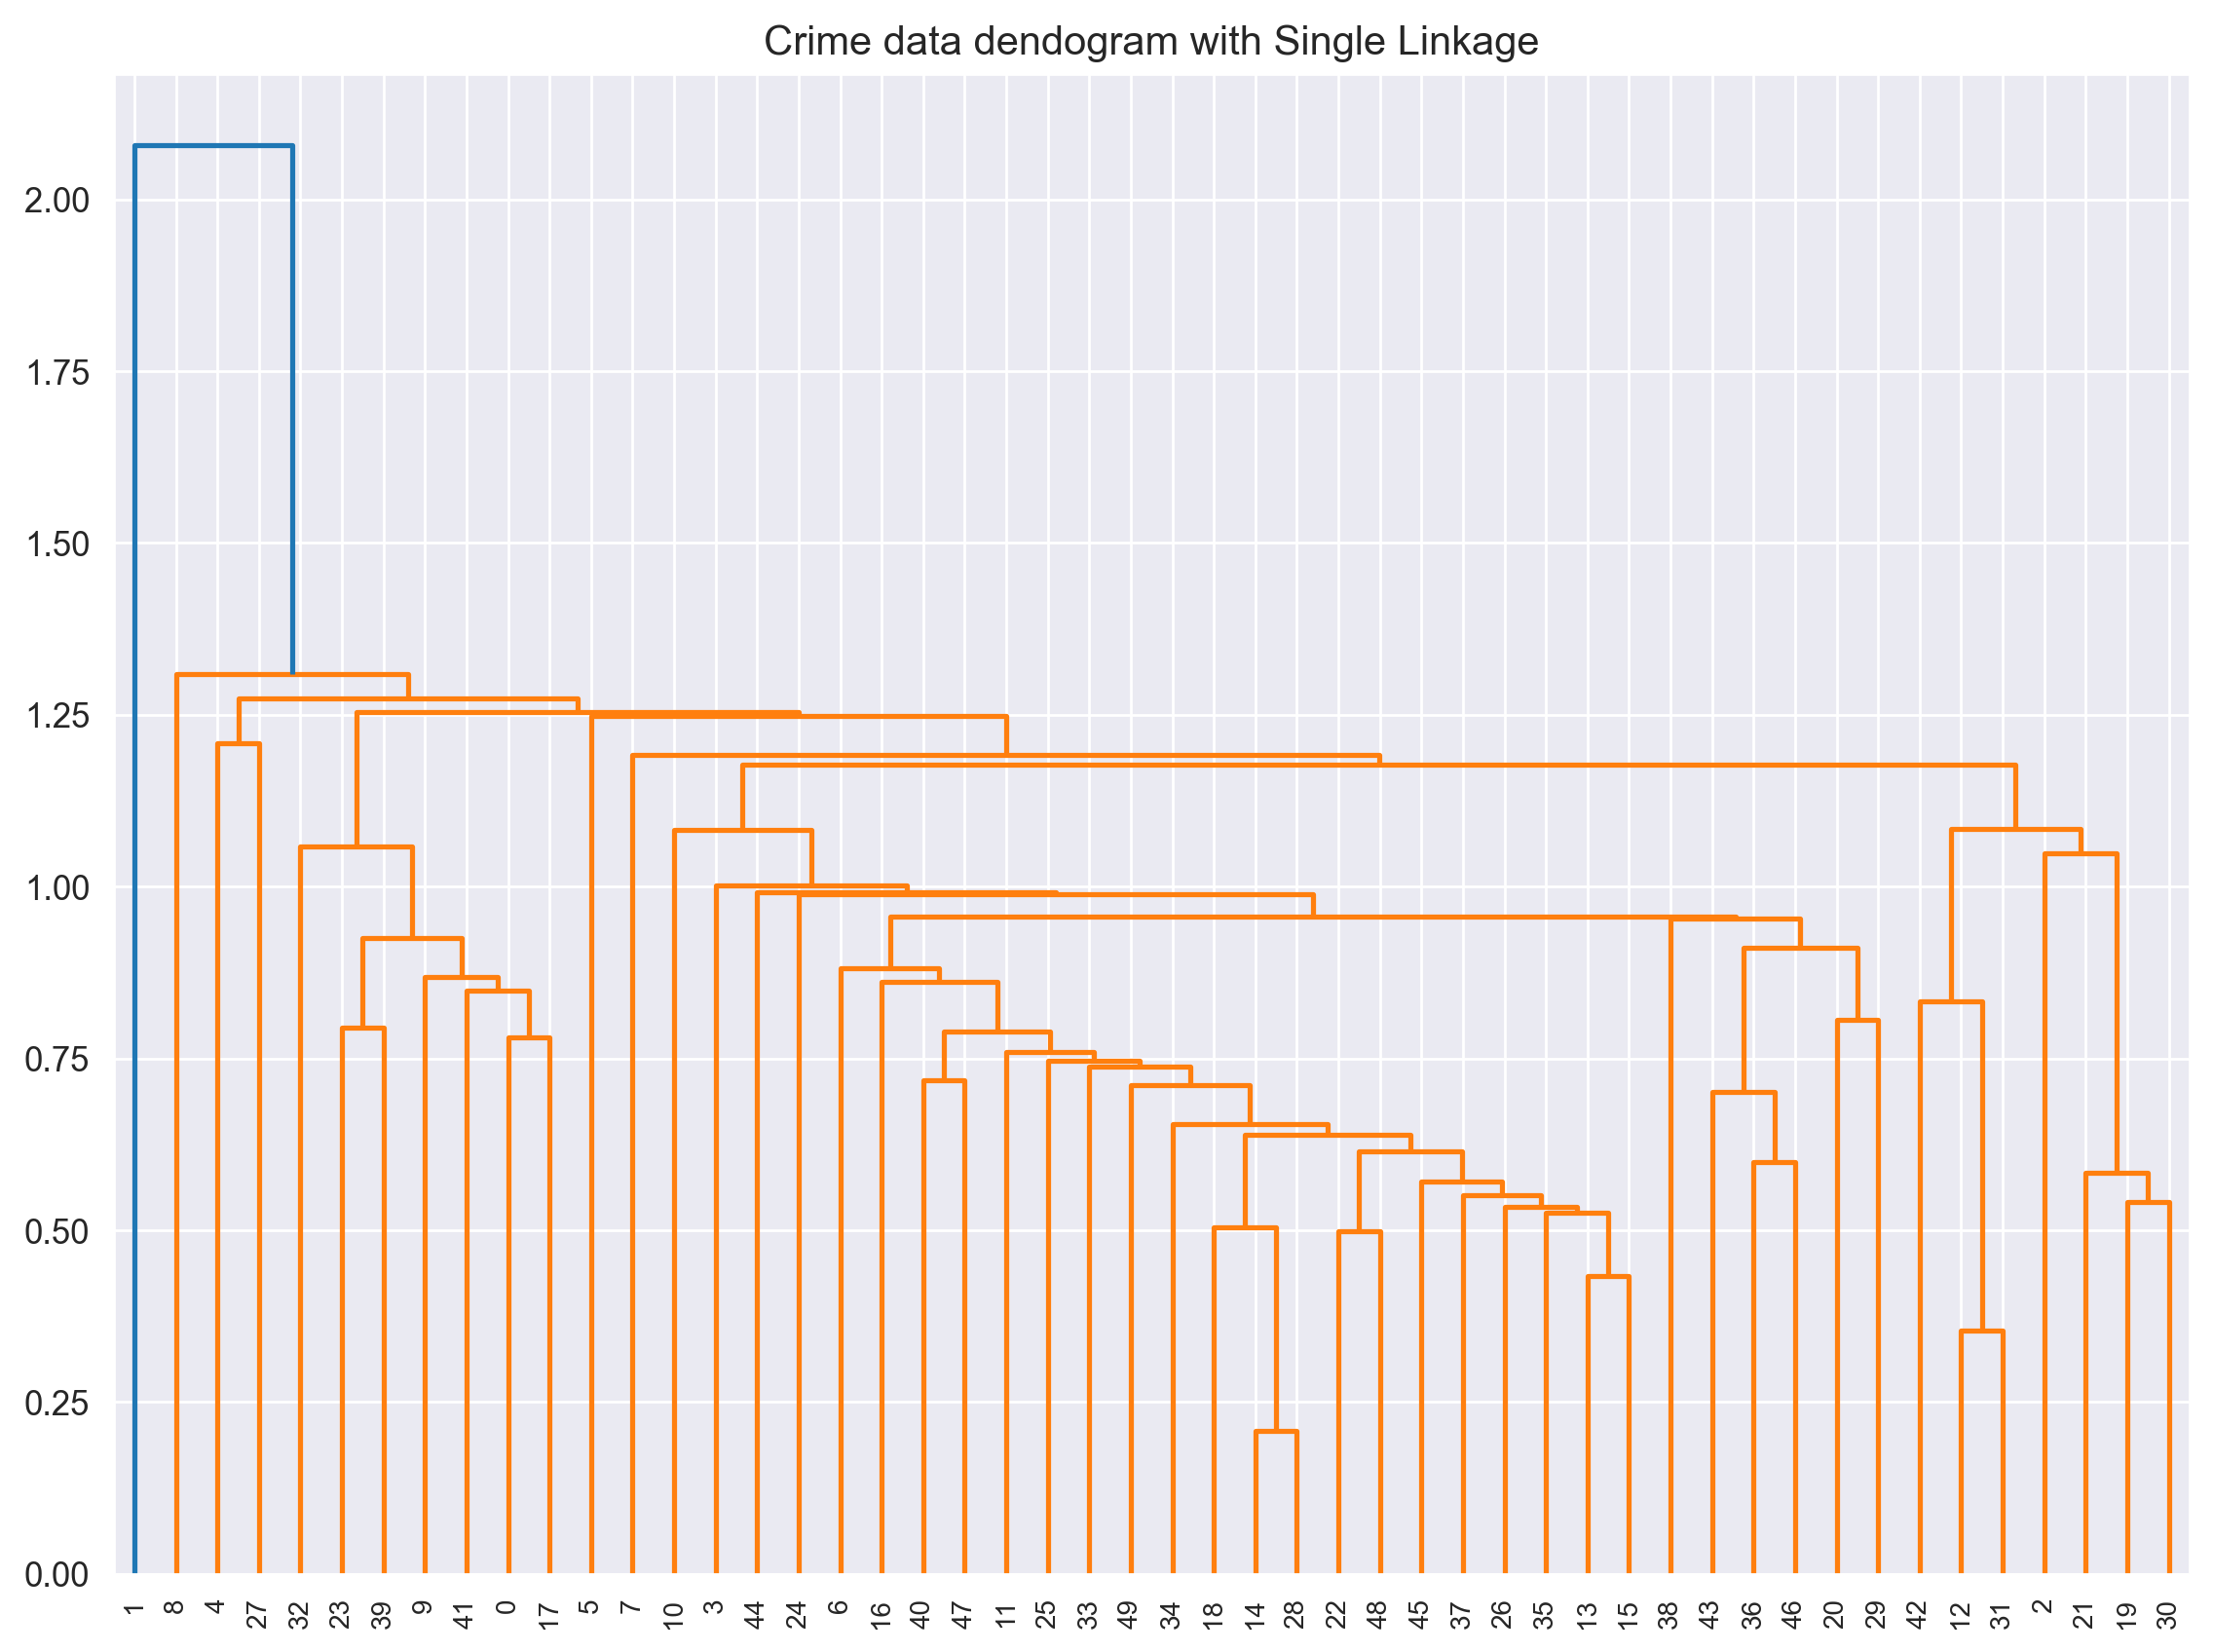

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Single linkage
# Set the size of the plot
plt.figure(figsize=(11,8))
# Set the title for the dendrogram plot
plt.title('Crime data dendogram with Single Linkage')
# Create a hierarchical clustering linkage using the 'X' data
lk = hierarchy.linkage(X, method='single')
# Plot the dendrogram based on the linkage
dendrogram = hierarchy.dendrogram(lk)



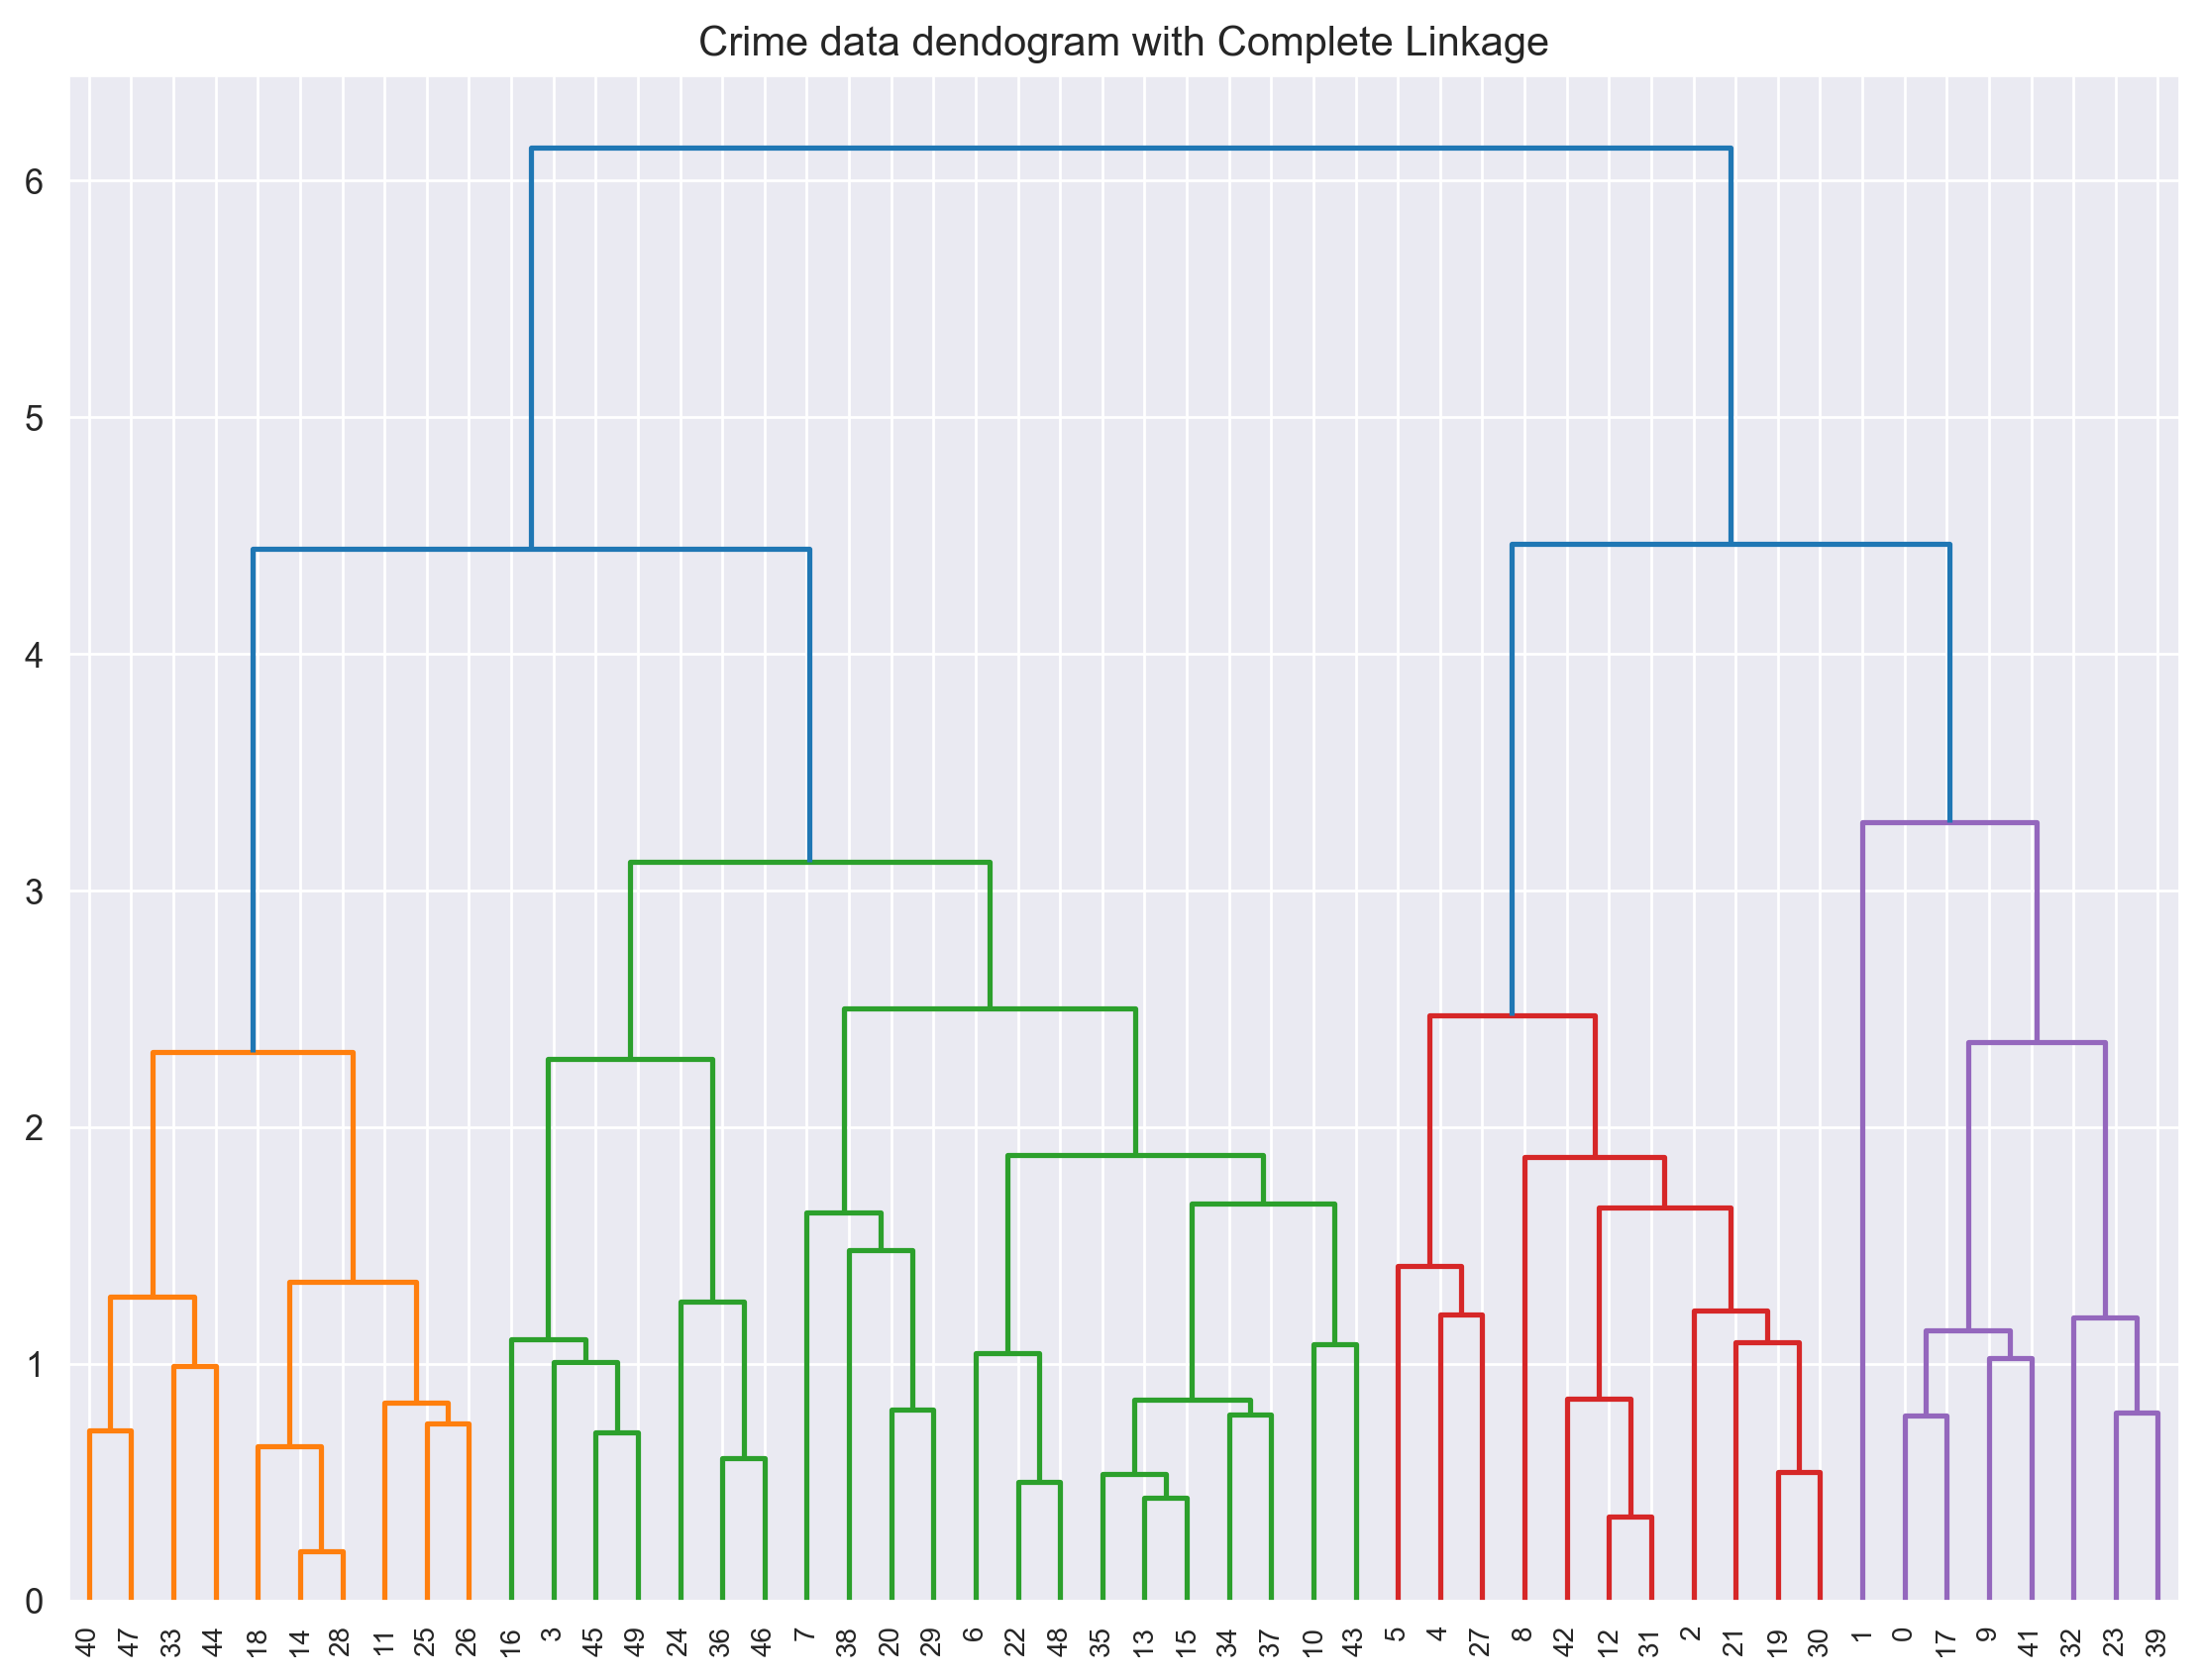

In [9]:
# Complete linkage
plt.figure(figsize=(11,8))
plt.title('Crime data dendogram with Complete Linkage')
# Create hierarchical clustering linkage using the 'X' data with complete linkage method
lk = hierarchy.linkage(X, method='complete')
# Plot the dendrogram based on the linkage
dendrogram = hierarchy.dendrogram(lk)

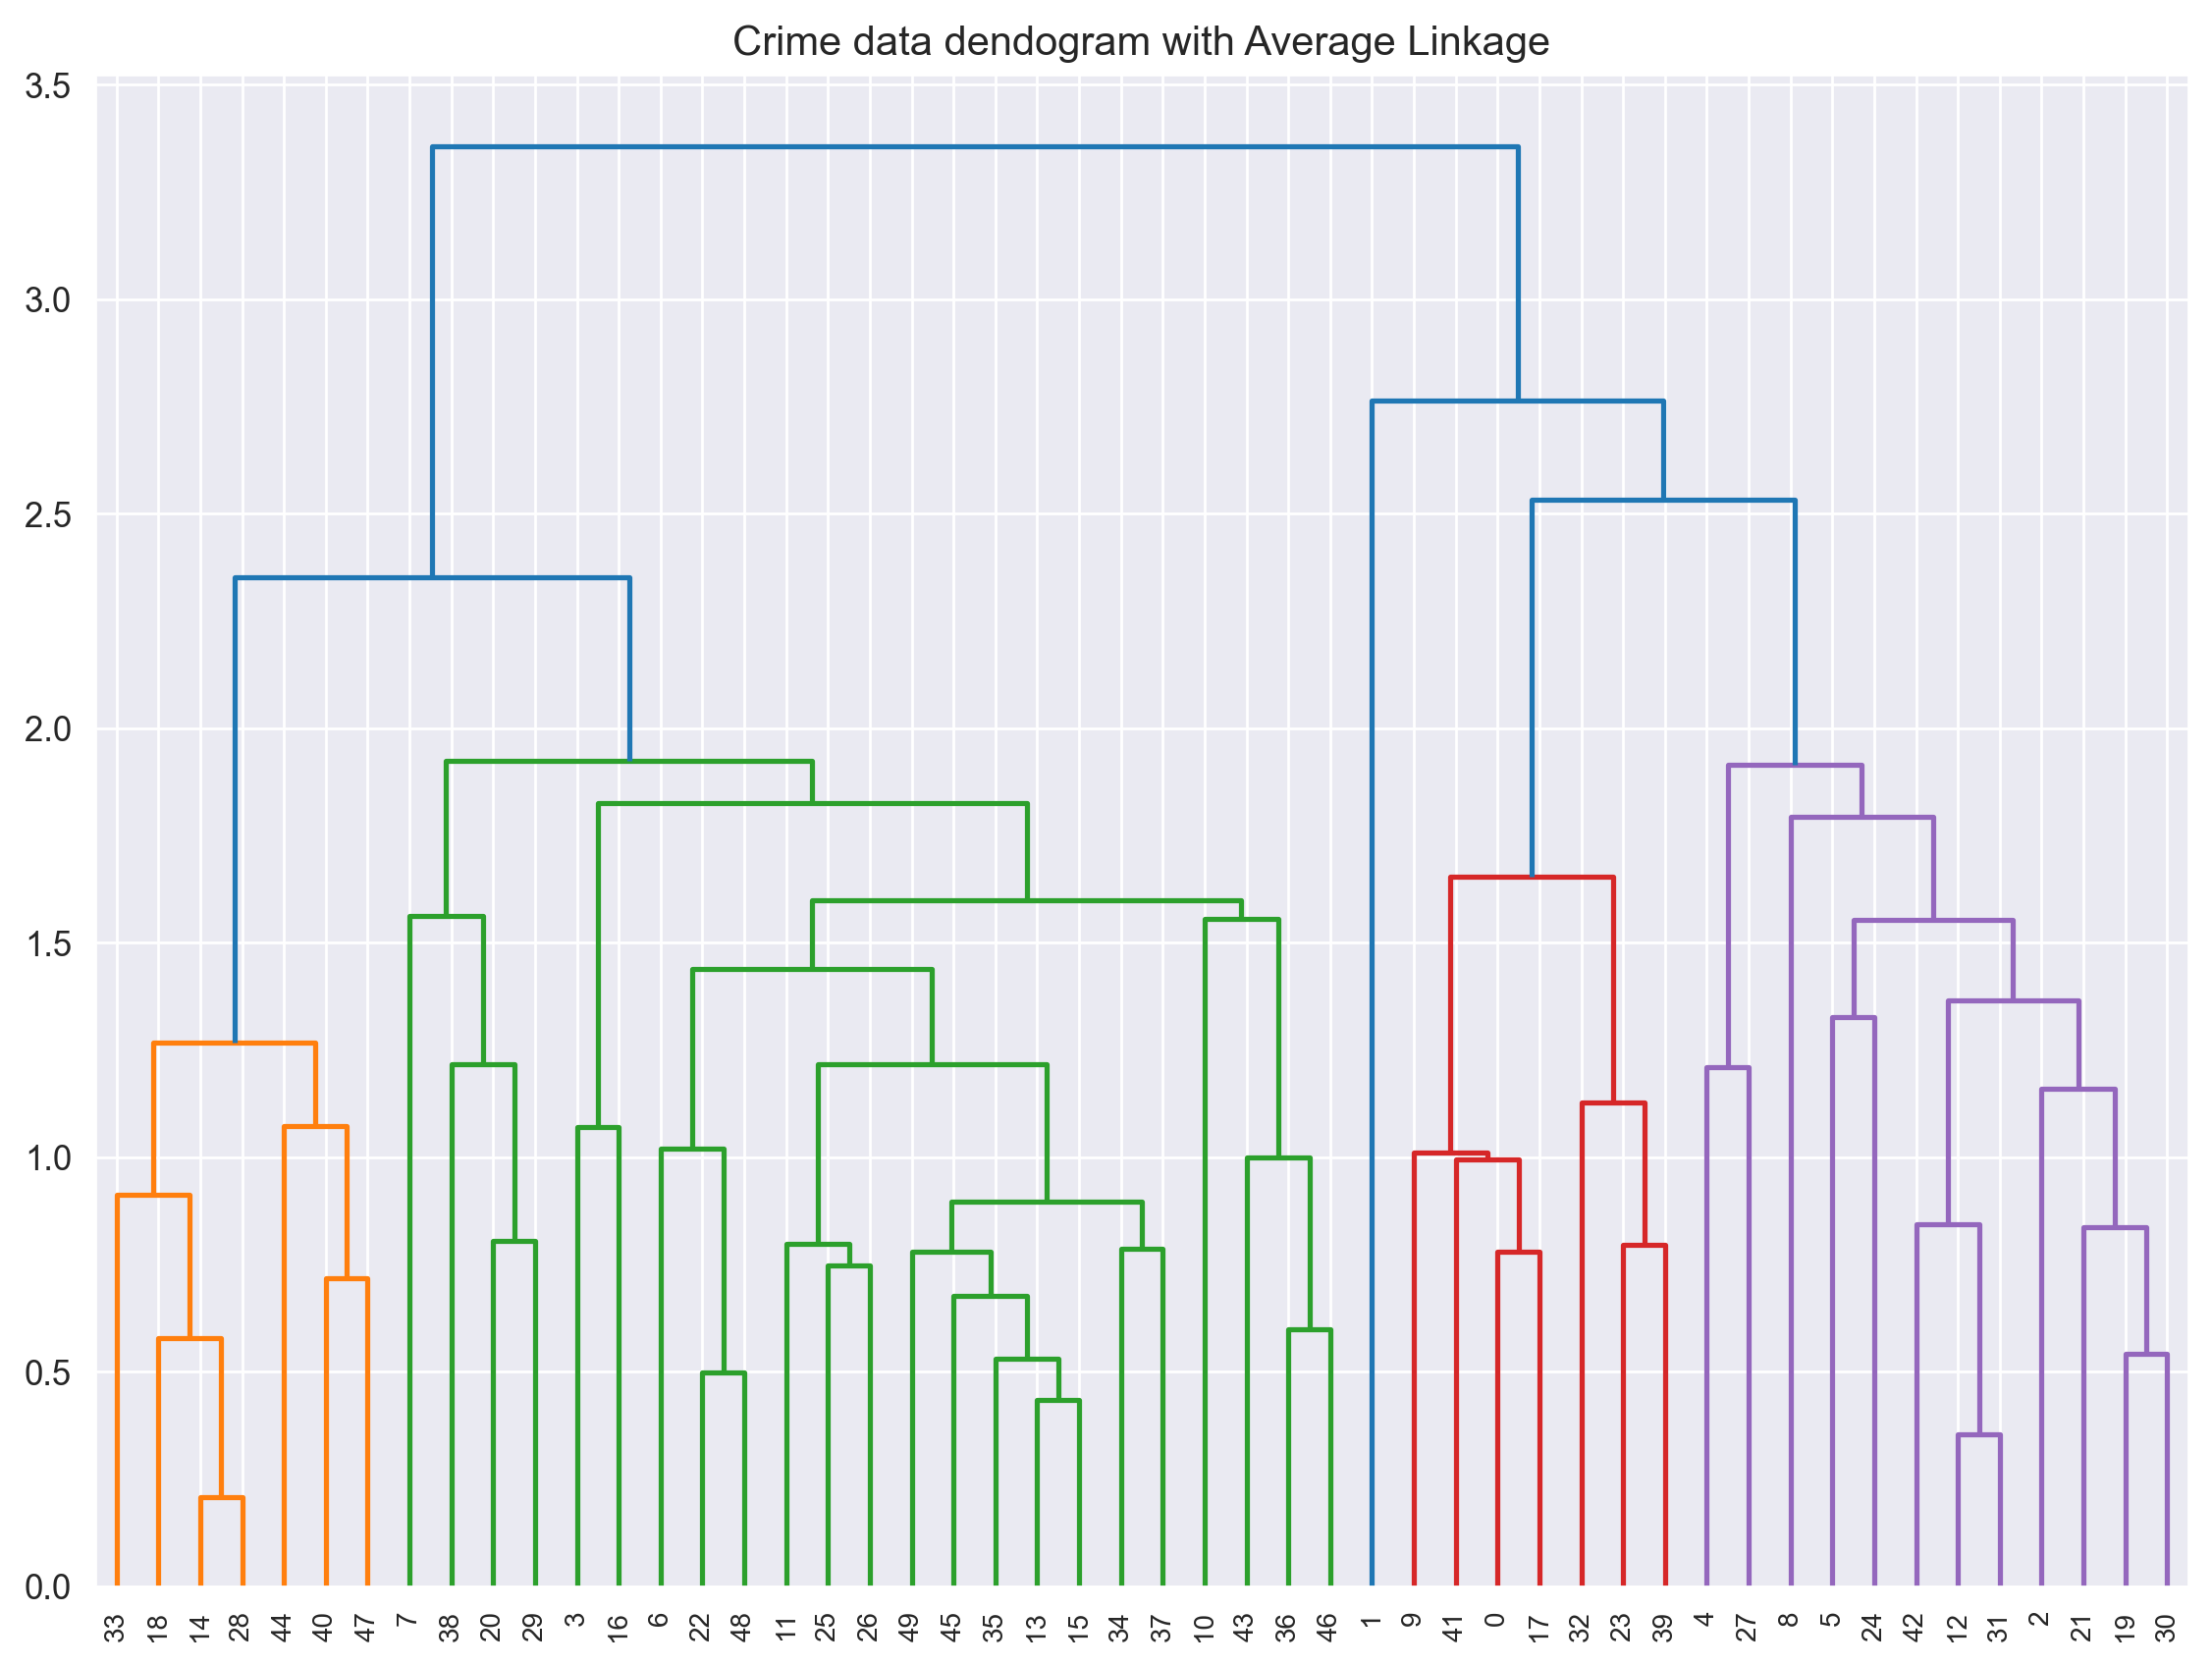

In [10]:
# Average linkage
plt.figure(figsize=(11,8))
plt.title('Crime data dendogram with Average Linkage')
 # Create hierarchical clustering linkage using the 'X' data with average linkage method
lk = hierarchy.linkage(X, method='average')
# Plot the dendrogram based on the linkage
dendrogram = hierarchy.dendrogram(lk)

## Model building


In [11]:
#create cluster
from sklearn.cluster import AgglomerativeClustering
# Initialize AgglomerativeClustering with parameters: 
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
# Fit the model to the standardized data 'X' and predict cluster labels
ypred = hc.fit_predict(X)

In [12]:
ak['clusters'] = ypred
ak

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [13]:
ak.groupby('clusters').mean()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


## using kMeans


In [14]:
from sklearn.cluster import KMeans
# Create a KMeans clustering model with 5 clusters
km = KMeans(n_clusters=5)
# Fit the model to the data 'X' and predict cluster labels
yp=km.fit_predict(X)
yp



array([0, 3, 3, 1, 3, 3, 4, 1, 3, 0, 4, 2, 3, 1, 2, 1, 1, 0, 2, 3, 4, 3,
       2, 0, 1, 2, 2, 3, 2, 4, 3, 3, 0, 2, 4, 1, 1, 4, 4, 0, 2, 0, 3, 4,
       2, 1, 1, 2, 2, 1])

In [15]:
km.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.17432343, -0.18001086, -0.09478364, -0.02894267],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.62921311, -0.57890856,  1.0789094 , -0.48472605]])

In [16]:
# Calculate the Within-Cluster-Sum-of-Squares (WCSS) for different numbers of clusters
wcss = []
# Loop through cluster counts from 1 to 10
for i in range(1,11):
    km = KMeans(n_clusters=i)# Create KMeans model with current cluster count
    km.fit_predict(X) # Fit the model to data and predict cluster labels
    wcss.append(km.inertia_)# Append WCSS value to the list


In [17]:
wcss



[200.0,
 104.96163315756871,
 79.92170303159772,
 57.55425863091104,
 50.071170568930896,
 43.78453188709798,
 39.16990059352821,
 35.45371227726498,
 31.469761322448846,
 27.880188127965507]

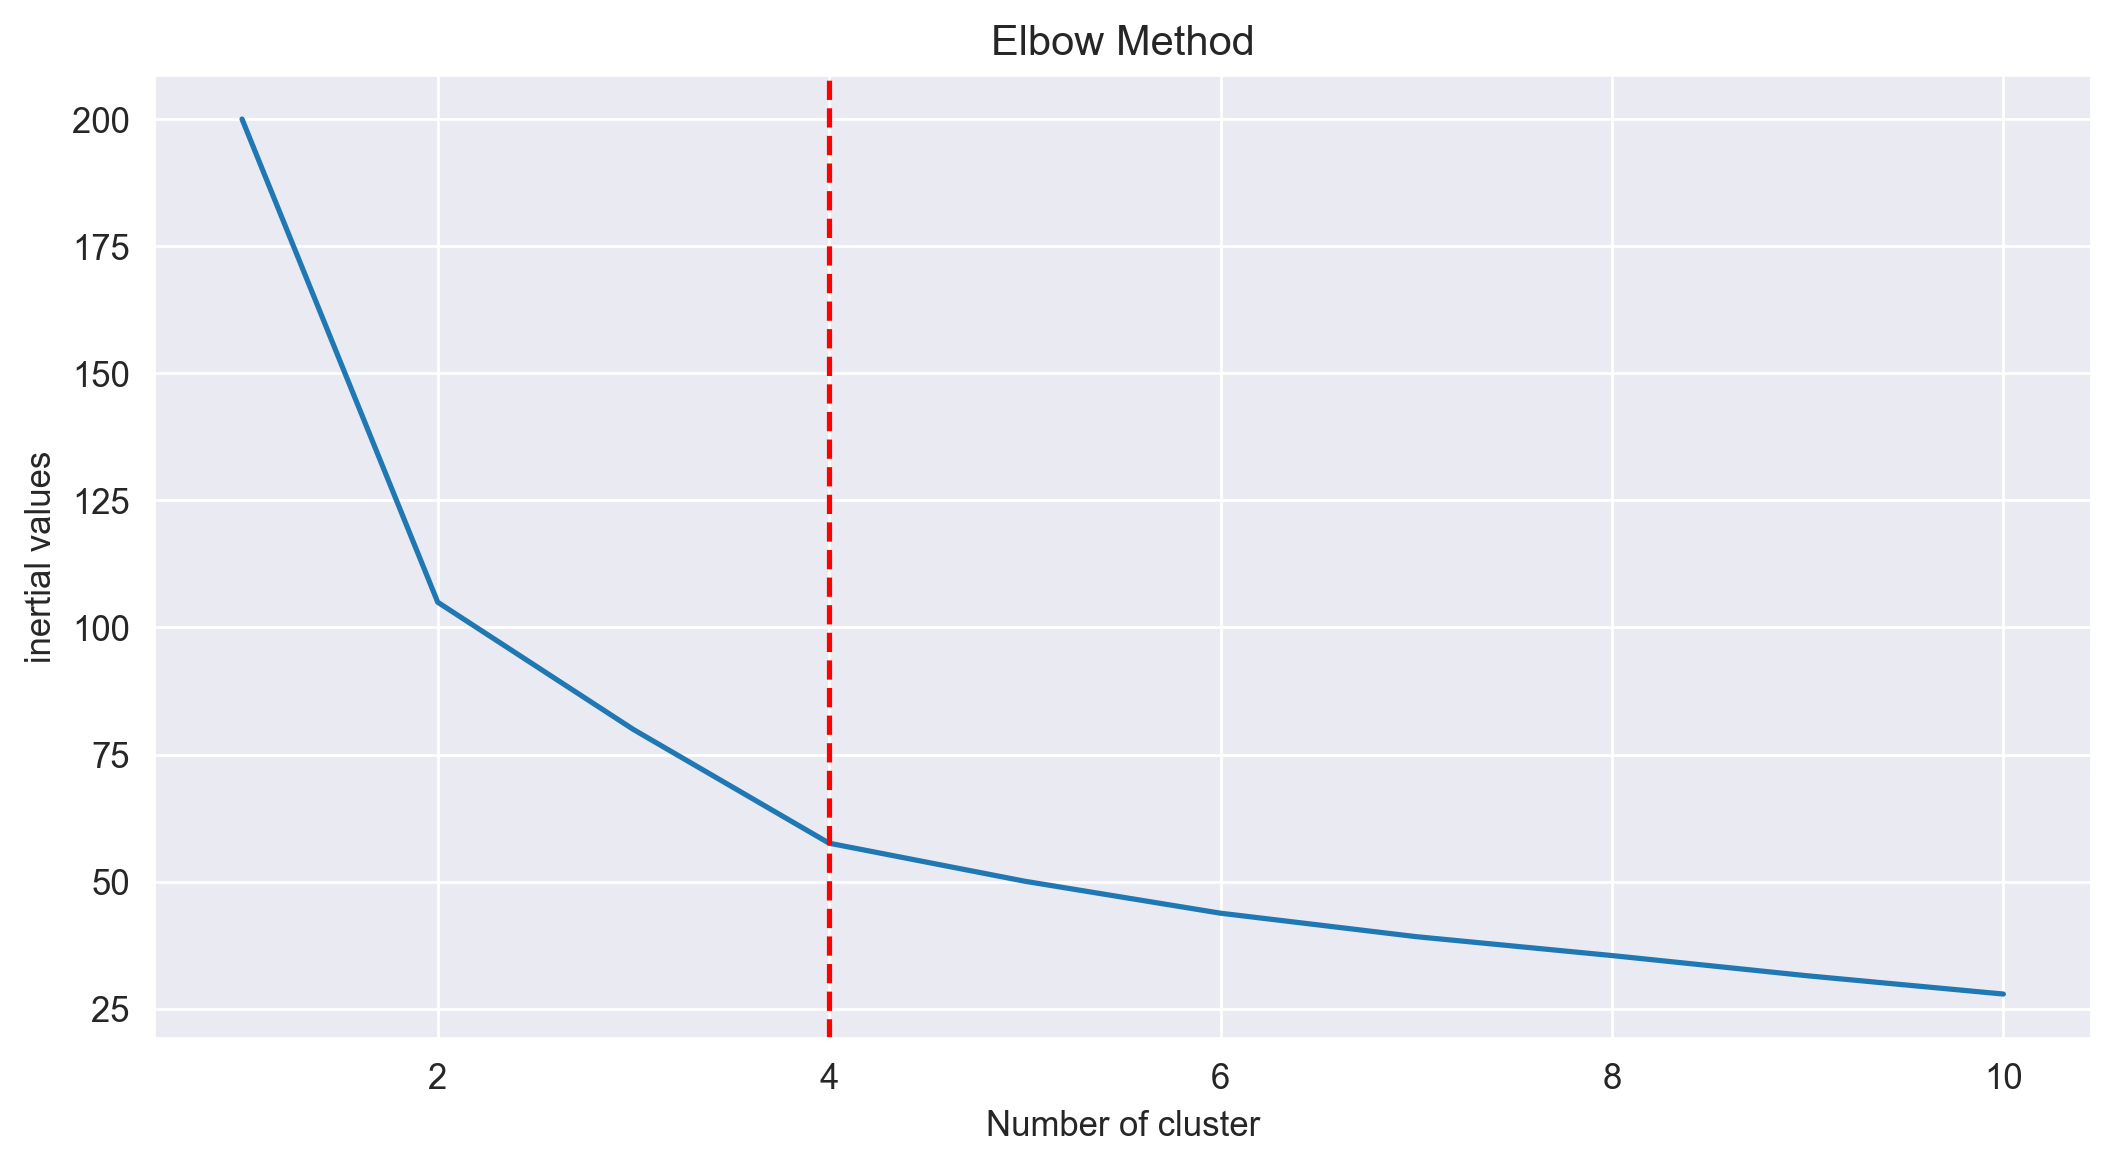

In [18]:
# Plotting the Elbow Method for Cluster Count Selection
# Plotting WCSS values for different numbers of clusters (1 to 10)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('Number of cluster')
plt.ylabel('inertial values')
plt.show()

In [19]:
# Create a KMeans clustering model with 4 clusters
model = KMeans(n_clusters=4)
# Fit the model to the data 'X' and predict cluster labels
ypred = model.fit_predict(X)
ypred



array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [20]:
#Silhouette score
from sklearn.metrics import silhouette_score
# Calculate and print the silhouette score for the clustering results
silhouette_score(X,ypred)







0.33968891433344395

In [21]:
Clust=pd.DataFrame(model.labels_,columns=['wcss'])
# Concatenate the original DataFrame 'df' and the cluster labels DataFrame 'Clust' along the columns
y3=pd.concat([ak,Clust], axis=1)
y3

,Murder,Assault,UrbanPop,Rape,clusters,wcss
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,0,2
2,8.1,294,80,31.0,2,2
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,2,2
5,7.9,204,78,38.7,2,2
6,3.3,110,77,11.1,1,3
7,5.9,238,72,15.8,1,3
8,15.4,335,80,31.9,2,2
9,17.4,211,60,25.8,0,0


In [22]:
y3.iloc[:,1:5].groupby(y3.wcss).mean()

,Assault,UrbanPop,Rape,clusters
wcss,,,,
0,243.625000,53.750000,21.412500,0.125000
1,78.538462,52.076923,12.176923,2.538462
2,257.384615,76.000000,33.192308,1.769231
3,138.875000,73.875000,18.781250,1.000000


## DBSCAn clustering

In [23]:
#standerization
x=ak.iloc[:,1:]
ss= StandardScaler()
x_ss = ss.fit_transform(x)
x_ss
# The standardized data is now stored in the variable 'x_ss'



array([[ 0.79078716, -0.52619514, -0.00345116, -1.48362952],
       [ 1.11805959, -1.22406668,  2.50942392, -1.48362952],
       [ 1.49381682,  1.00912225,  1.05346626,  0.54873968],
       [ 0.23321191, -1.08449238, -0.18679398, -0.46744492],
       [ 1.2756352 ,  1.77678094,  2.08881393,  0.54873968],
       [ 0.40290872,  0.86954794,  1.88390137,  0.54873968],
       [-0.73648418,  0.79976079, -1.09272319, -0.46744492],
       [ 0.81502956,  0.45082502, -0.58583422, -0.46744492],
       [ 1.99078607,  1.00912225,  1.1505301 ,  0.54873968],
       [ 0.48775713, -0.38662083,  0.49265293, -1.48362952],
       [-1.51224105,  1.21848371, -0.11129987, -0.46744492],
       [-0.61527217, -0.80534376, -0.75839217,  1.56492429],
       [ 0.94836277,  1.21848371,  0.29852525,  0.54873968],
       [-0.70012057, -0.03768506, -0.0250209 , -0.46744492],
       [-1.39102904, -0.5959823 , -1.07115345,  1.56492429],
       [-0.67587817,  0.03210209, -0.34856705, -0.46744492],
       [-0.74860538, -0.

In [24]:
from sklearn.cluster import DBSCAN
DBSCAN()



DBSCAN()

In [25]:
dbscan=DBSCAN(eps=1,min_samples=6)
# Create a DBSCAN clustering model with specified parameters
dbscan.fit(x_ss)# Fit the model to the standardized data 'x_ss'
dbscan.labels_

array([-1, -1,  0,  2, -1, -1,  2, -1,  0, -1,  2,  1,  0,  2,  1,  2,  2,
       -1,  1,  0,  2,  0,  2, -1,  2,  1,  1, -1,  1,  2,  0,  0, -1,  1,
        2,  2,  2,  2,  2, -1,  1, -1, -1,  2,  1,  2,  2,  1,  2,  2],
      dtype=int64)

In [26]:
c1=pd.DataFrame(dbscan.labels_,columns=['DBclust'])
c1
 

,DBclust
0,-1
1,-1
2,0
3,2
4,-1
5,-1
6,2
7,-1
8,0
9,-1


In [27]:
# Concatenate the original DataFrame 
#'ak' and the DBSCAN cluster labels DataFrame 
#'c1' along the columns
DBclust=pd.concat([ak,c1],axis=1)
DBclust

,Murder,Assault,UrbanPop,Rape,clusters,DBclust
0,13.2,236,58,21.2,0,-1
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,2,0
3,8.8,190,50,19.5,1,2
4,9.0,276,91,40.6,2,-1
5,7.9,204,78,38.7,2,-1
6,3.3,110,77,11.1,1,2
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,2,0
9,17.4,211,60,25.8,0,-1


In [28]:
noisedata= DBclust[DBclust['DBclust']==-1]
print(noisedata)

    Murder  Assault  UrbanPop  Rape  clusters  DBclust
0     13.2      236        58  21.2         0       -1
1     10.0      263        48  44.5         0       -1
4      9.0      276        91  40.6         2       -1
5      7.9      204        78  38.7         2       -1
7      5.9      238        72  15.8         1       -1
9     17.4      211        60  25.8         0       -1
17    15.4      249        66  22.2         0       -1
23    16.1      259        44  17.1         0       -1
27    12.2      252        81  46.0         2       -1
32    13.0      337        45  16.1         0       -1
39    14.4      279        48  22.5         0       -1
41    13.2      188        59  26.9         0       -1
42    12.7      201        80  25.5         2       -1


In [29]:
# Select data points in the 'DBclust' column of the 'DBclust' DataFrame where the value is 0
finaldata= DBclust[DBclust['DBclust']==0]
print(finaldata)

    Murder  Assault  UrbanPop  Rape  clusters  DBclust
2      8.1      294        80  31.0         2        0
8     15.4      335        80  31.9         2        0
12    10.4      249        83  24.0         2        0
19    11.3      300        67  27.8         2        0
21    12.1      255        74  35.1         2        0
30    11.4      285        70  32.1         2        0
31    11.1      254        86  26.1         2        0


In [30]:
# Grouping and calculating the mean of features for each DBSCAN cluster in the 'DBclust' DataFrame

DBclust.iloc[:,1:5].groupby(DBclust.DBclust).mean()



,Assault,UrbanPop,Rape,clusters
DBclust,,,,
-1,245.615385,63.846154,27.915385,0.692308
0,281.714286,77.142857,29.714286,2.000000
1,78.700000,49.300000,11.630000,3.000000
2,129.300000,70.700000,18.720000,1.000000
